In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv(r'C:\Users\shanj\Downloads\2020Q1Q2Q3Q4-2021Q1 - Russia - Sberbank Rossii PAO (SBER).csv')
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (311, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",291.02,294,294.42,290.26,47.00M,-0.76%
1,"Mar 30, 2021",293.25,294.86,295.72,291.5,38.81M,-0.02%
2,"Mar 29, 2021",293.3,289.72,294.09,289.26,43.68M,0.71%
3,"Mar 26, 2021",291.22,288.63,292.75,288.32,56.07M,1.59%
4,"Mar 25, 2021",286.66,286.5,287.03,283.85,35.22M,0.30%
...,...,...,...,...,...,...,...
306,"Jan 10, 2020",258.19,257.86,259.25,256.88,18.85M,0.08%
307,"Jan 09, 2020",257.99,259.4,261.76,257.01,38.33M,-0.45%
308,"Jan 08, 2020",259.15,253.57,259.15,253.03,40.82M,2.07%
309,"Jan 06, 2020",253.9,254.75,254.84,251.4,22.35M,-0.43%


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Convert date column to yyyy-mm-dd format
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')


df=df.sort_values(by=['Date'])

print(df)

           Date   Price    Open    High     Low    Vol. Change %
310  2020-01-03     255  255.99  258.19   253.7  35.85M    0.10%
309  2020-01-06   253.9  254.75  254.84   251.4  22.35M   -0.43%
308  2020-01-08  259.15  253.57  259.15  253.03  40.82M    2.07%
307  2020-01-09  257.99   259.4  261.76  257.01  38.33M   -0.45%
306  2020-01-10  258.19  257.86  259.25  256.88  18.85M    0.08%
..          ...     ...     ...     ...     ...     ...      ...
4    2021-03-25  286.66   286.5  287.03  283.85  35.22M    0.30%
3    2021-03-26  291.22  288.63  292.75  288.32  56.07M    1.59%
2    2021-03-29   293.3  289.72  294.09  289.26  43.68M    0.71%
1    2021-03-30  293.25  294.86  295.72   291.5  38.81M   -0.02%
0    2021-03-31  291.02     294  294.42  290.26  47.00M   -0.76%

[311 rows x 7 columns]


In [6]:
df1=df

In [7]:
df1.reset_index(drop=True, inplace=True)

In [8]:
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-03,255,255.99,258.19,253.7,35.85M,0.10%
1,2020-01-06,253.9,254.75,254.84,251.4,22.35M,-0.43%
2,2020-01-08,259.15,253.57,259.15,253.03,40.82M,2.07%
3,2020-01-09,257.99,259.4,261.76,257.01,38.33M,-0.45%
4,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.08%
...,...,...,...,...,...,...,...
306,2021-03-25,286.66,286.5,287.03,283.85,35.22M,0.30%
307,2021-03-26,291.22,288.63,292.75,288.32,56.07M,1.59%
308,2021-03-29,293.3,289.72,294.09,289.26,43.68M,0.71%
309,2021-03-30,293.25,294.86,295.72,291.5,38.81M,-0.02%


In [9]:
df1.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [10]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [11]:
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')

In [12]:
train_data = df1[df1['Date'] <= '2020-12-30']


In [13]:
train_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-03,255.00,255.99,258.19,253.7,35.85M,0.10%
1,2020-01-06,253.90,254.75,254.84,251.4,22.35M,-0.43%
2,2020-01-08,259.15,253.57,259.15,253.03,40.82M,2.07%
3,2020-01-09,257.99,259.4,261.76,257.01,38.33M,-0.45%
4,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.08%
...,...,...,...,...,...,...,...
245,2020-12-24,269.32,271.98,272.82,267.13,42.61M,-0.29%
246,2020-12-25,270.64,269.97,271,268.28,11.99M,0.49%
247,2020-12-28,274.70,270.9,275.19,269.73,39.04M,1.50%
248,2020-12-29,272.00,275.91,276.43,271.26,39.02M,-0.98%


In [14]:
train_data = df1[df1['Date'] <= '2020-12-31']
test_data=df1[df1['Date'] > '2020-12-31']

In [15]:
test_data.shape[0]

61

In [16]:
import pmdarima as pm

In [17]:
auto_model = pm.auto_arima(train_data['Price'], seasonal=True, m=12) 

In [18]:
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -747.842
Date:                Tue, 30 Apr 2024   AIC                           1497.685
Time:                        12:47:49   BIC                           1501.202
Sample:                             0   HQIC                          1499.101
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        23.7810      1.267     18.772      0.000      21.298      26.264
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):               142.35
Prob(Q):                              0.52   Pr

In [19]:
df1.dtypes

Date        datetime64[ns]
Price              float64
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [20]:
forecast = auto_model.predict(n_periods=1)

In [21]:
forecast.values[0]

271.65

In [22]:
forecasted_price = forecast.iloc[0]
print("Forecasted stock price on January 1st, 2022:", forecasted_price)

Forecasted stock price on January 1st, 2022: 271.65


In [36]:
Predictions=[]

In [37]:
for step in range(test_data.shape[0]):
    if not train_data.empty:
        
        train_data = df1[df1['Date'] < test_data.iloc[step, 0]]
        #train_data=train_data['Date'].iloc[0, 0]
        # Fit auto ARIMA model
        auto_model = pm.auto_arima(train_data['Price'], seasonal=True, m=12)# m= number of seasonalites

        # Forecast the stock price for the next day
        forecast = auto_model.predict(n_periods=1)
        # Forecasting one period ahead

        # Print the forecast for the next day
        print("Forecasted stock price for the next day:", forecast.values[0])
        
        Predictions.append(forecast.values[0])

        # Update the training data by including the next day
     
    else:
        print("No data available for training on step", step + 1)
        break

Forecasted stock price for the next day: 271.65
Forecasted stock price for the next day: 272.2943416539624
Forecasted stock price for the next day: 274.4939264872108
Forecasted stock price for the next day: 272.93
Forecasted stock price for the next day: 283.64
Forecasted stock price for the next day: 289.49
Forecasted stock price for the next day: 289.99
Forecasted stock price for the next day: 283.78
Forecasted stock price for the next day: 284.79
Forecasted stock price for the next day: 276.9
Forecasted stock price for the next day: 279.79
Forecasted stock price for the next day: 278.19
Forecasted stock price for the next day: 279.8
Forecasted stock price for the next day: 274.3999999999999
Forecasted stock price for the next day: 268.25
Forecasted stock price for the next day: 265.3
Forecasted stock price for the next day: 269.34
Forecasted stock price for the next day: 265.5
Forecasted stock price for the next day: 265.96
Forecasted stock price for the next day: 258.11
Forecasted 

In [38]:
Predictions

[271.65,
 272.2943416539624,
 274.4939264872108,
 272.93,
 283.64,
 289.49,
 289.99,
 283.78,
 284.79,
 276.9,
 279.79,
 278.19,
 279.8,
 274.3999999999999,
 268.25,
 265.3,
 269.34,
 265.5,
 265.96,
 258.11,
 263.8,
 263.15,
 263.53,
 270.11,
 271.7,
 275.2,
 268.98,
 265.9,
 264.7,
 266.0,
 271.81,
 270.9,
 270.9,
 266.99,
 271.34,
 270.51,
 273.71,
 271.9,
 270.71,
 270.17,
 273.58,
 279.1,
 278.01,
 274.75,
 277.5,
 285.79,
 282.24,
 286.0,
 284.93,
 292.74,
 292.33,
 283.35,
 279.25,
 285.47,
 288.65,
 282.6,
 285.79,
 286.66,
 291.22,
 293.3,
 293.25]

In [57]:
test_data.iloc[0, 0]

Timestamp('2021-01-04 00:00:00')

In [39]:
test_data['predictions']=Predictions

C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\367764177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions']=Predictions


In [40]:
test_data

,Date,Price,Open,High,Low,Vol.,Change %,predictions
250,2021-01-04,272.00,274.67,276.6,270.61,48.92M,0.13%,271.650000
251,2021-01-05,275.20,272.69,275.7,270.28,45.58M,1.18%,272.294342
252,2021-01-06,272.93,275.94,275.94,271.62,40.95M,-0.82%,274.493926
253,2021-01-08,283.64,275.11,283.99,275.11,88.93M,3.92%,272.930000
254,2021-01-11,289.49,282.86,292.95,279.48,112.35M,2.06%,283.640000
...,...,...,...,...,...,...,...,...
306,2021-03-25,286.66,286.5,287.03,283.85,35.22M,0.30%,285.790000
307,2021-03-26,291.22,288.63,292.75,288.32,56.07M,1.59%,286.660000
308,2021-03-29,293.30,289.72,294.09,289.26,43.68M,0.71%,291.220000
309,2021-03-30,293.25,294.86,295.72,291.5,38.81M,-0.02%,293.300000


In [44]:
train_data['test_data_price']=test_data['Price']
train_data['predictions']=test_data['predictions']

C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1394921403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['test_data_price']=test_data['Price']
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1394921403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['predictions']=test_data['predictions']


In [46]:
train_data

,Date,Price,Open,High,Low,Vol.,Change %,test_data_price,predictions
0,2020-01-03,255.00,255.99,258.19,253.7,35.85M,0.10%,NaN,NaN
1,2020-01-06,253.90,254.75,254.84,251.4,22.35M,-0.43%,NaN,NaN
2,2020-01-08,259.15,253.57,259.15,253.03,40.82M,2.07%,NaN,NaN
3,2020-01-09,257.99,259.4,261.76,257.01,38.33M,-0.45%,NaN,NaN
4,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.08%,NaN,NaN
...,...,...,...,...,...,...,...,...,...
305,2021-03-24,285.79,283.4,288,282.25,46.41M,1.13%,285.79,282.60
306,2021-03-25,286.66,286.5,287.03,283.85,35.22M,0.30%,286.66,285.79
307,2021-03-26,291.22,288.63,292.75,288.32,56.07M,1.59%,291.22,286.66
308,2021-03-29,293.30,289.72,294.09,289.26,43.68M,0.71%,293.30,291.22


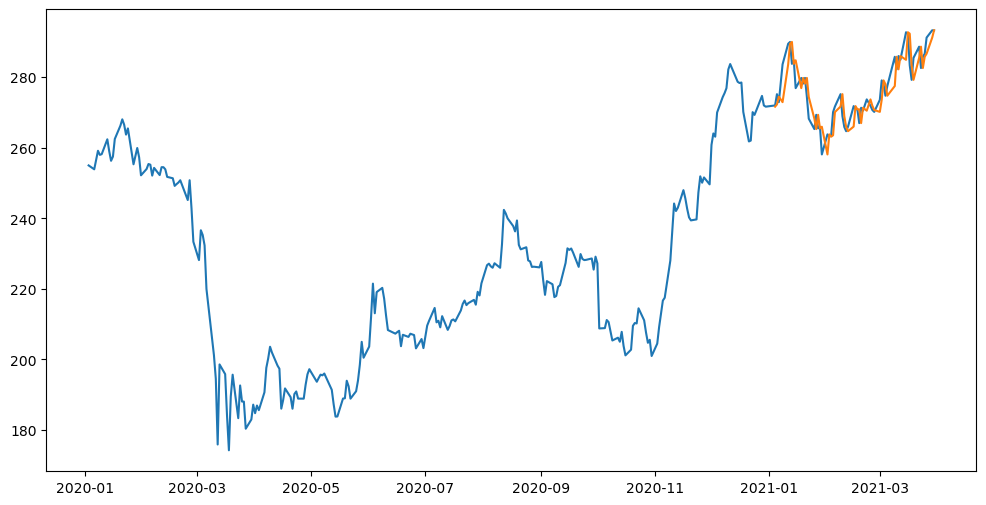

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Price')
plt.plot(train_data['Date'], train_data['predictions'], label='SMA')

In [60]:
train_data.head(22)

,Date,Price,Open,High,Low,Vol.,Change %,SMA,SD,UBB,LBB
0,2020-01-03,255.00,255.99,258.19,253.7,35.85M,0.10%,NaN,NaN,NaN,NaN
1,2020-01-06,253.90,254.75,254.84,251.4,22.35M,-0.43%,NaN,NaN,NaN,NaN
2,2020-01-08,259.15,253.57,259.15,253.03,40.82M,2.07%,NaN,NaN,NaN,NaN
3,2020-01-09,257.99,259.4,261.76,257.01,38.33M,-0.45%,NaN,NaN,NaN,NaN
4,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.08%,NaN,NaN,NaN,NaN
5,2020-01-13,262.40,258.3,262.4,257.15,25.86M,1.63%,NaN,NaN,NaN,NaN
6,2020-01-14,259.05,262.5,263.22,258.62,31.13M,-1.28%,NaN,NaN,NaN,NaN
7,2020-01-15,256.31,258.49,258.91,254.21,49.36M,-1.06%,NaN,NaN,NaN,NaN
8,2020-01-16,257.51,257.11,259.51,256.1,40.25M,0.47%,NaN,NaN,NaN,NaN
9,2020-01-17,262.50,258.2,262.82,257.75,44.91M,1.94%,NaN,NaN,NaN,NaN


In [59]:
def calculate_bollinger_bands(train_data, window=20, num_std_dev=2, price_column='Price'):
    # Calculate the Simple Moving Average (SMA)
    train_data['SMA'] = train_data[price_column].rolling(window=window).mean().shift()

    # Calculate the Standard Deviation (SD)
    train_data['SD'] = train_data[price_column].rolling(window=window).std().shift()

    # Calculate the Upper Bollinger Band (UBB) and Lower Bollinger Band (LBB)
    train_data['UBB'] = train_data['SMA'] + num_std_dev * train_data['SD']
    train_data['LBB'] = train_data['SMA'] - num_std_dev * train_data['SD']

    return train_data



# Calculate Bollinger Bands
train_data = calculate_bollinger_bands(train_data)

# Display the DataFrame with Bollinger Bands
print(train_data)

          Date   Price    Open    High     Low    Vol. Change %       SMA  \
0   2020-01-03  255.00  255.99  258.19   253.7  35.85M    0.10%       NaN   
1   2020-01-06  253.90  254.75  254.84   251.4  22.35M   -0.43%       NaN   
2   2020-01-08  259.15  253.57  259.15  253.03  40.82M    2.07%       NaN   
3   2020-01-09  257.99   259.4  261.76  257.01  38.33M   -0.45%       NaN   
4   2020-01-10  258.19  257.86  259.25  256.88  18.85M    0.08%       NaN   
..         ...     ...     ...     ...     ...     ...      ...       ...   
306 2021-03-25  286.66   286.5  287.03  283.85  35.22M    0.30%  281.2430   
307 2021-03-26  291.22  288.63  292.75  288.32  56.07M    1.59%  281.9810   
308 2021-03-29  293.30  289.72  294.09  289.26  43.68M    0.71%  283.0065   
309 2021-03-30  293.25  294.86  295.72   291.5  38.81M   -0.02%  284.1630   
310 2021-03-31  291.02     294  294.42  290.26  47.00M   -0.76%  285.1465   

           SD         UBB         LBB  
0         NaN         NaN         N

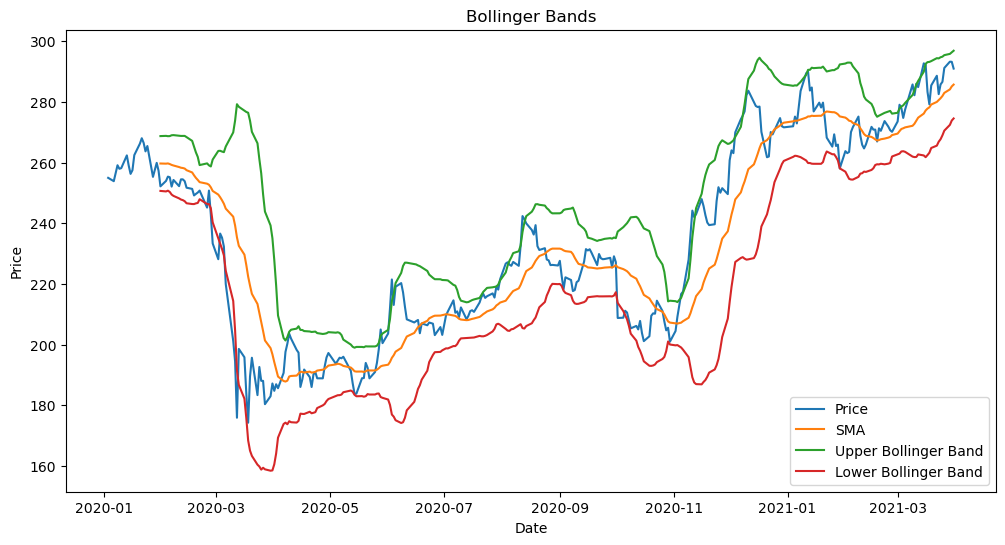

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price')
plt.plot(df['Date'], df['SMA'], label='SMA')
plt.plot(df['Date'], df['UBB'], label='Upper Bollinger Band')
plt.plot(df['Date'], df['LBB'], label='Lower Bollinger Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
def calculate_profit(train_data):
    # Initialize variables
    balance = 10000  # Initial balance in USD
    shares = 0
    position = None
    buy_price = None
    profit = 0

    # Iterate through each row in the DataFrame
    for index, row in train_data.iterrows():
        close_price = row['Price']
        upper_band = row['UBB']
        lower_band = row['LBB']

        # Buy condition: price is below the lower Bollinger Band
        if close_price < lower_band:
            if position != 'buy':
                shares = balance / close_price
                buy_price = close_price
                balance = 0
                position = 'buy'
            else:
                 position='hold'

        # Sell condition: price is above the upper Bollinger Band
        elif close_price > upper_band:
            if position != 'sell' and shares>0:
                balance = shares * close_price
                profit += balance - 10000  # Subtract initial balance
                shares = 0
                position = 'sell'
            else:
                 position='hold'
        else:
            position='hold'
        print(close_price,position,shares,balance,shares*close_price,(shares*close_price)+balance-10000,row['Date'])  
      

    # Sell remaining shares at the last data point
    if position == 'buy':
        balance = shares * df.iloc[-1]['Price']
        profit += balance - 10000  # Subtract initial balance
        

    return profit

# Example usage:
# Calculate Bollinger Bands
train_data = calculate_bollinger_bands(train_data)

# Calculate profit
profit = calculate_profit(train_data[train_data['Date'] > '2020-12-31'])
print("Profit from Bollinger Bands trading strategy: ${:.2f}".format(profit))

272.0 hold 0 10000 0.0 0.0 2021-01-04 00:00:00
275.2 hold 0 10000 0.0 0.0 2021-01-05 00:00:00
272.93 hold 0 10000 0.0 0.0 2021-01-06 00:00:00
283.64 hold 0 10000 0.0 0.0 2021-01-08 00:00:00
289.49 hold 0 10000 0.0 0.0 2021-01-11 00:00:00
289.99 hold 0 10000 0.0 0.0 2021-01-12 00:00:00
283.78 hold 0 10000 0.0 0.0 2021-01-13 00:00:00
284.79 hold 0 10000 0.0 0.0 2021-01-14 00:00:00
276.9 hold 0 10000 0.0 0.0 2021-01-15 00:00:00
279.79 hold 0 10000 0.0 0.0 2021-01-18 00:00:00
278.19 hold 0 10000 0.0 0.0 2021-01-19 00:00:00
279.8 hold 0 10000 0.0 0.0 2021-01-20 00:00:00
274.4 hold 0 10000 0.0 0.0 2021-01-21 00:00:00
268.25 hold 0 10000 0.0 0.0 2021-01-22 00:00:00
265.3 hold 0 10000 0.0 0.0 2021-01-25 00:00:00
269.34 hold 0 10000 0.0 0.0 2021-01-26 00:00:00
265.5 hold 0 10000 0.0 0.0 2021-01-27 00:00:00
265.96 hold 0 10000 0.0 0.0 2021-01-28 00:00:00
258.11 buy 38.7431715160203 0 10000.0 0.0 2021-01-29 00:00:00
263.8 hold 38.7431715160203 0 10220.448645926155 220.44864592615522 2021-02-01 00

In [70]:
df=pd.read_csv(r'C:\Users\shanj\Downloads\2020Q1Q2Q3Q4-2021Q1 - Turkey - Koc Holding AS (KCHOL).csv')

In [71]:
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (315, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",19.41,19.42,19.63,19.27,13.14M,-0.46%
1,"Mar 30, 2021",19.5,19.12,19.81,19.03,21.05M,2.09%
2,"Mar 29, 2021",19.1,19.24,19.67,19.1,16.56M,-0.78%
3,"Mar 26, 2021",19.25,20.28,20.36,19.1,21.35M,-3.85%
4,"Mar 25, 2021",20.02,20.5,20.86,20.02,15.93M,-1.48%
...,...,...,...,...,...,...,...
310,"Jan 08, 2020",19.94,19.89,19.95,19.66,2.79M,0.05%
311,"Jan 07, 2020",19.93,20.22,20.28,19.92,2.89M,-0.75%
312,"Jan 06, 2020",20.08,20.34,20.34,19.97,1.94M,-1.08%
313,"Jan 03, 2020",20.3,20.3,20.44,19.97,3.31M,-0.39%


In [72]:
df['Date'] = pd.to_datetime(df['Date'])

# Convert date column to yyyy-mm-dd format
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')


df=df.sort_values(by=['Date'])

print(df)

           Date  Price   Open   High    Low    Vol. Change %
314  2020-01-02  20.38  20.42  20.44  20.24   2.53M    0.30%
313  2020-01-03   20.3   20.3  20.44  19.97   3.31M   -0.39%
312  2020-01-06  20.08  20.34  20.34  19.97   1.94M   -1.08%
311  2020-01-07  19.93  20.22  20.28  19.92   2.89M   -0.75%
310  2020-01-08  19.94  19.89  19.95  19.66   2.79M    0.05%
..          ...    ...    ...    ...    ...     ...      ...
4    2021-03-25  20.02   20.5  20.86  20.02  15.93M   -1.48%
3    2021-03-26  19.25  20.28  20.36   19.1  21.35M   -3.85%
2    2021-03-29   19.1  19.24  19.67   19.1  16.56M   -0.78%
1    2021-03-30   19.5  19.12  19.81  19.03  21.05M    2.09%
0    2021-03-31  19.41  19.42  19.63  19.27  13.14M   -0.46%

[315 rows x 7 columns]


In [73]:
df1=df
df1.reset_index(drop=True, inplace=True)
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,20.38,20.42,20.44,20.24,2.53M,0.30%
1,2020-01-03,20.3,20.3,20.44,19.97,3.31M,-0.39%
2,2020-01-06,20.08,20.34,20.34,19.97,1.94M,-1.08%
3,2020-01-07,19.93,20.22,20.28,19.92,2.89M,-0.75%
4,2020-01-08,19.94,19.89,19.95,19.66,2.79M,0.05%
...,...,...,...,...,...,...,...
310,2021-03-25,20.02,20.5,20.86,20.02,15.93M,-1.48%
311,2021-03-26,19.25,20.28,20.36,19.1,21.35M,-3.85%
312,2021-03-29,19.1,19.24,19.67,19.1,16.56M,-0.78%
313,2021-03-30,19.5,19.12,19.81,19.03,21.05M,2.09%


In [74]:
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,20.38,20.42,20.44,20.24,2.53M,0.30%
1,2020-01-03,20.3,20.3,20.44,19.97,3.31M,-0.39%
2,2020-01-06,20.08,20.34,20.34,19.97,1.94M,-1.08%
3,2020-01-07,19.93,20.22,20.28,19.92,2.89M,-0.75%
4,2020-01-08,19.94,19.89,19.95,19.66,2.79M,0.05%
...,...,...,...,...,...,...,...
310,2021-03-25,20.02,20.5,20.86,20.02,15.93M,-1.48%
311,2021-03-26,19.25,20.28,20.36,19.1,21.35M,-3.85%
312,2021-03-29,19.1,19.24,19.67,19.1,16.56M,-0.78%
313,2021-03-30,19.5,19.12,19.81,19.03,21.05M,2.09%


In [75]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')

In [102]:
train_data = df1[df1['Date'] <= '2020-12-31']
test_data=df1[df1['Date'] > '2020-12-31']

In [103]:
import pmdarima as pm
auto_model = pm.auto_arima(train_data['Price'], seasonal=True, m=12) 
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -125.481
Date:                Tue, 07 May 2024   AIC                            252.963
Time:                        14:29:55   BIC                            256.488
Sample:                             0   HQIC                           254.382
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1591      0.011     14.188      0.000       0.137       0.181
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                20.09
Prob(Q):                              0.41   Pr

In [104]:
Predictions=[]
for step in range(test_data.shape[0]):
    if not train_data.empty:
        
        train_data = df1[df1['Date'] < test_data.iloc[step, 0]]
        #train_data=train_data['Date'].iloc[0, 0]
        # Fit auto ARIMA model
        auto_model = pm.auto_arima(train_data['Price'], seasonal=True, m=12)# m= number of seasonalites

        # Forecast the stock price for the next day
        forecast = auto_model.predict(n_periods=1)
        # Forecasting one period ahead

        # Print the forecast for the next day
        print("Forecasted stock price for the next day:", forecast.values[0])
        
        Predictions.append(forecast.values[0])

        # Update the training data by including the next day
     
    else:
        print("No data available for training on step", step + 1)
        break

Forecasted stock price for the next day: 21.12
Forecasted stock price for the next day: 21.2
Forecasted stock price for the next day: 21.14
Forecasted stock price for the next day: 21.14
Forecasted stock price for the next day: 21.1
Forecasted stock price for the next day: 21.52
Forecasted stock price for the next day: 21.8
Forecasted stock price for the next day: 22.307836069665267
Forecasted stock price for the next day: 22.0954431661717
Forecasted stock price for the next day: 22.216293035433573
Forecasted stock price for the next day: 21.42
Forecasted stock price for the next day: 22.311095104249475
Forecasted stock price for the next day: 22.390660566961937
Forecasted stock price for the next day: 22.759695786584878
Forecasted stock price for the next day: 22.0
Forecasted stock price for the next day: 22.02
Forecasted stock price for the next day: 21.64
Forecasted stock price for the next day: 21.48
Forecasted stock price for the next day: 20.42
Forecasted stock price for the next

In [94]:
test_data

,Date,Price,Open,High,Low,Vol.,Change %
252,2021-01-04,21.20,21.12,21.5,21.04,10.53M,0.38%
253,2021-01-05,21.14,21,21.6,20.86,15.65M,-0.28%
254,2021-01-06,21.14,21.24,21.34,20.86,12.23M,0.00%
255,2021-01-07,21.10,21.2,21.26,20.88,7.91M,-0.19%
256,2021-01-08,21.52,21.22,21.52,21.12,10.36M,1.99%
...,...,...,...,...,...,...,...
310,2021-03-25,20.02,20.5,20.86,20.02,15.93M,-1.48%
311,2021-03-26,19.25,20.28,20.36,19.1,21.35M,-3.85%
312,2021-03-29,19.10,19.24,19.67,19.1,16.56M,-0.78%
313,2021-03-30,19.50,19.12,19.81,19.03,21.05M,2.09%


In [105]:
test_data['predictions']=Predictions

C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\367764177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions']=Predictions


In [106]:
train_data['test_data_price']=test_data['Price']
train_data['predictions']=test_data['predictions']

C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1394921403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['test_data_price']=test_data['Price']
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1394921403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['predictions']=test_data['predictions']


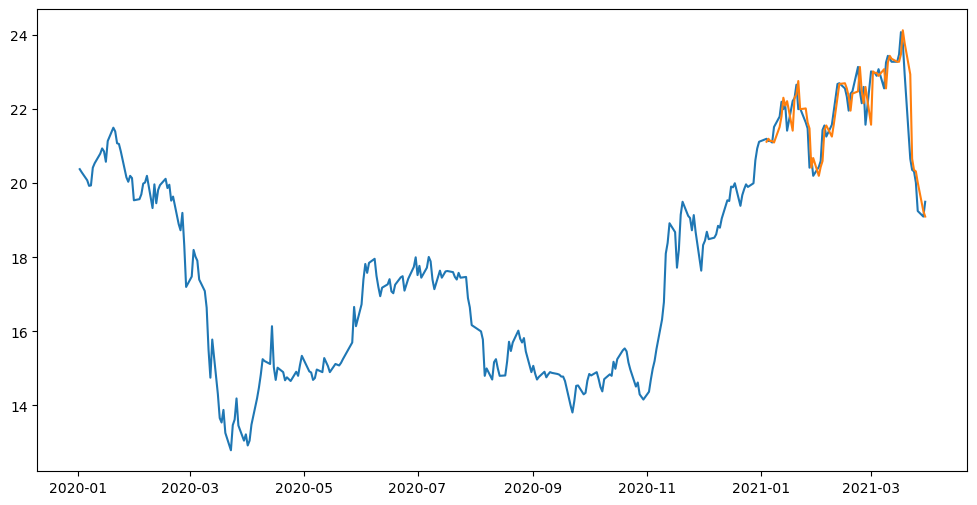

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Price')
plt.plot(train_data['Date'], train_data['predictions'], label='Date')

In [108]:
def calculate_bollinger_bands(train_data, window=20, num_std_dev=2, price_column='Price'):
    # Calculate the Simple Moving Average (SMA)
    train_data['SMA'] = train_data[price_column].rolling(window=window).mean().shift()

    # Calculate the Standard Deviation (SD)
    train_data['SD'] = train_data[price_column].rolling(window=window).std().shift()

    # Calculate the Upper Bollinger Band (UBB) and Lower Bollinger Band (LBB)
    train_data['UBB'] = train_data['SMA'] + num_std_dev * train_data['SD']
    train_data['LBB'] = train_data['SMA'] - num_std_dev * train_data['SD']

    return train_data



# Calculate Bollinger Bands
train_data = calculate_bollinger_bands(train_data)

# Display the DataFrame with Bollinger Bands
print(train_data)

          Date  Price   Open   High    Low    Vol. Change %  test_data_price  \
0   2020-01-02  20.38  20.42  20.44  20.24   2.53M    0.30%              NaN   
1   2020-01-03  20.30   20.3  20.44  19.97   3.31M   -0.39%              NaN   
2   2020-01-06  20.08  20.34  20.34  19.97   1.94M   -1.08%              NaN   
3   2020-01-07  19.93  20.22  20.28  19.92   2.89M   -0.75%              NaN   
4   2020-01-08  19.94  19.89  19.95  19.66   2.79M    0.05%              NaN   
..         ...    ...    ...    ...    ...     ...      ...              ...   
309 2021-03-24  20.32  20.54     21  20.16  20.42M   -0.20%            20.32   
310 2021-03-25  20.02   20.5  20.86  20.02  15.93M   -1.48%            20.02   
311 2021-03-26  19.25  20.28  20.36   19.1  21.35M   -3.85%            19.25   
312 2021-03-29  19.10  19.24  19.67   19.1  16.56M   -0.78%            19.10   
313 2021-03-30  19.50  19.12  19.81  19.03  21.05M    2.09%            19.50   

     predictions      SMA        SD    

C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\3520393558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SMA'] = train_data[price_column].rolling(window=window).mean().shift()
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\3520393558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SD'] = train_data[price_column].rolling(window=window).std().shift()
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\3520393558.py:9: SettingWithCopyWarning: 
A value is trying to be set on

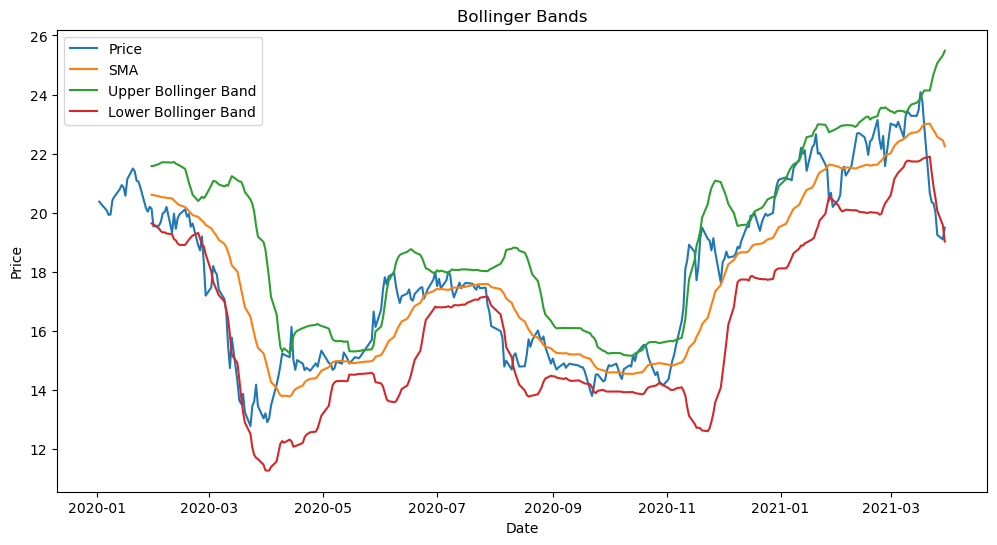

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Price')
plt.plot(train_data['Date'], train_data['SMA'], label='SMA')
plt.plot(train_data['Date'], train_data['UBB'], label='Upper Bollinger Band')
plt.plot(train_data['Date'], train_data['LBB'], label='Lower Bollinger Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [90]:
train_data

,Date,Price,Open,High,Low,Vol.,Change %,test_data_price,predictions,SMA,SD,UBB,LBB
252,2021-01-04,21.20,21.12,21.5,21.04,10.53M,0.38%,21.20,21.12,NaN,NaN,NaN,NaN
253,2021-01-05,21.14,21,21.6,20.86,15.65M,-0.28%,21.14,21.20,NaN,NaN,NaN,NaN
254,2021-01-06,21.14,21.24,21.34,20.86,12.23M,0.00%,21.14,21.14,NaN,NaN,NaN,NaN
255,2021-01-07,21.10,21.2,21.26,20.88,7.91M,-0.19%,21.10,21.14,NaN,NaN,NaN,NaN
256,2021-01-08,21.52,21.22,21.52,21.12,10.36M,1.99%,21.52,21.10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2021-03-24,20.32,20.54,21,20.16,20.42M,-0.20%,20.32,20.36,22.7890,0.951574,24.692149,20.885851
310,2021-03-25,20.02,20.5,20.86,20.02,15.93M,-1.48%,20.02,20.32,22.6970,1.093893,24.884785,20.509215
311,2021-03-26,19.25,20.28,20.36,19.1,21.35M,-3.85%,19.25,20.02,22.5680,1.247303,25.062606,20.073394
312,2021-03-29,19.10,19.24,19.67,19.1,16.56M,-0.78%,19.10,19.25,22.4515,1.438586,25.328672,19.574328


In [132]:
def calculate_profit(train_data):
    # Initialize variables
    balance = 10000  # Initial balance in USD
    shares = 0
    position = None
    buy_price = None
    profit = 0

    # Iterate through each row in the DataFrame
    for index, row in train_data.iterrows():
        close_price = row['Price']
        upper_band = row['UBB']
        lower_band = row['LBB']

        # Buy condition: price is below the lower Bollinger Band
        
        if close_price < lower_band:
            if shares==0:
                shares = balance / close_price
                buy_price = close_price
                balance = 0
                position = 'buy'
            else:
                 position='hold'

        # Sell condition: price is above the upper Bollinger Band
        elif close_price > upper_band:
            if  shares>0:
                balance = shares * close_price
                profit += balance - 10000  # Subtract initial balance
                shares = 0
                position = 'sell'
            else:
                 position='hold'
        else:
            position='hold'
        print(close_price,position,shares,balance,shares*close_price,(shares*close_price)+balance-10000,row['Date'])  
      

    # Sell remaining shares at the last data point
    if position == 'buy':
        balance = shares * df.iloc[-1]['Price']
        profit += balance - 10000  # Subtract initial balance
        

    return profit

# Example usage:
# Calculate Bollinger Bands
train_data = calculate_bollinger_bands(train_data)

# Calculate profit
profit = calculate_profit(train_data[train_data['Date'] > '2020-12-31'])
print("Profit from Bollinger Bands trading strategy: ${:.2f}".format(profit))

21.2 hold 0 10000 0.0 0.0 2021-01-04 00:00:00
21.14 hold 0 10000 0.0 0.0 2021-01-05 00:00:00
21.14 hold 0 10000 0.0 0.0 2021-01-06 00:00:00
21.1 hold 0 10000 0.0 0.0 2021-01-07 00:00:00
21.52 hold 0 10000 0.0 0.0 2021-01-08 00:00:00
21.8 hold 0 10000 0.0 0.0 2021-01-11 00:00:00
22.2 hold 0 10000 0.0 0.0 2021-01-12 00:00:00
22.0 hold 0 10000 0.0 0.0 2021-01-13 00:00:00
22.12 hold 0 10000 0.0 0.0 2021-01-14 00:00:00
21.42 hold 0 10000 0.0 0.0 2021-01-15 00:00:00
22.22 hold 0 10000 0.0 0.0 2021-01-18 00:00:00
22.3 hold 0 10000 0.0 0.0 2021-01-19 00:00:00
22.66 hold 0 10000 0.0 0.0 2021-01-20 00:00:00
22.0 hold 0 10000 0.0 0.0 2021-01-21 00:00:00
22.02 hold 0 10000 0.0 0.0 2021-01-22 00:00:00
21.64 hold 0 10000 0.0 0.0 2021-01-25 00:00:00
21.48 hold 0 10000 0.0 0.0 2021-01-26 00:00:00
20.42 buy 489.7159647404505 0 10000.0 0.0 2021-01-27 00:00:00
20.68 hold 489.7159647404505 0 10127.326150832516 127.32615083251585 2021-01-28 00:00:00
20.2 hold 489.7159647404505 0 9892.2624877571 -107.737512

C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1130934194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SMA'] = train_data[price_column].rolling(window=window).mean().shift()
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1130934194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SD'] = train_data[price_column].rolling(window=window).std().shift()
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1130934194.py:9: SettingWithCopyWarning: 
A value is trying to be set on

In [112]:
dfE=pd.read_csv(r'C:\Users\shanj\Downloads\2020Q1Q2Q3Q4-2021Q1 - Egypt - Medinet Nasr Housing (MNHD).csv')
dfE=dfE.dropna()
print('Shape of data',df.shape)
dfE.head()
dfE

Shape of data (315, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",3.75,3.74,3.82,3.71,1.57M,0.54%
1,"Mar 30, 2021",3.73,3.71,3.76,3.67,3.43M,0.81%
2,"Mar 29, 2021",3.7,3.69,3.73,3.68,1.25M,-0.27%
3,"Mar 28, 2021",3.71,3.76,3.76,3.68,2.34M,0.00%
4,"Mar 25, 2021",3.71,3.62,3.78,3.59,2.50M,1.37%
...,...,...,...,...,...,...,...
300,"Jan 09, 2020",4.62,4.55,4.7,4.55,2.09M,4.76%
301,"Jan 08, 2020",4.41,4.19,4.59,4.15,3.52M,3.04%
302,"Jan 06, 2020",4.28,4.16,4.44,4.12,2.52M,-2.95%
303,"Jan 05, 2020",4.41,4.7,4.7,4.33,3.76M,-8.32%


In [114]:
dfE['Date'] = pd.to_datetime(dfE['Date'])

# Convert date column to yyyy-mm-dd format
dfE['Date'] = dfE['Date'].dt.strftime('%Y-%m-%d')


dfE=dfE.sort_values(by=['Date'])

print(dfE)

           Date Price  Open  High   Low     Vol. Change %
304  2020-01-02  4.81  4.81  4.87  4.78  241.60K   -0.21%
303  2020-01-05  4.41   4.7   4.7  4.33    3.76M   -8.32%
302  2020-01-06  4.28  4.16  4.44  4.12    2.52M   -2.95%
301  2020-01-08  4.41  4.19  4.59  4.15    3.52M    3.04%
300  2020-01-09  4.62  4.55   4.7  4.55    2.09M    4.76%
..          ...   ...   ...   ...   ...      ...      ...
4    2021-03-25  3.71  3.62  3.78  3.59    2.50M    1.37%
3    2021-03-28  3.71  3.76  3.76  3.68    2.34M    0.00%
2    2021-03-29   3.7  3.69  3.73  3.68    1.25M   -0.27%
1    2021-03-30  3.73  3.71  3.76  3.67    3.43M    0.81%
0    2021-03-31  3.75  3.74  3.82  3.71    1.57M    0.54%

[305 rows x 7 columns]


In [115]:
dfE.reset_index(drop=True, inplace=True)

In [118]:
dfE['Date'] = pd.to_datetime(dfE['Date'])
dfE['Price'] = pd.to_numeric(dfE['Price'], errors='coerce')

In [119]:
train_data_E = dfE[dfE['Date'] <= '2020-12-31']
test_data_E=dfE[dfE['Date'] > '2020-12-31']

In [120]:
import pmdarima as pm
auto_model = pm.auto_arima(train_data_E['Price'], seasonal=True, m=12) 
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 239.493
Date:                Tue, 07 May 2024   AIC                           -474.986
Time:                        15:39:28   BIC                           -468.008
Sample:                             0   HQIC                          -472.175
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2548      0.047      5.437      0.000       0.163       0.347
sigma2         0.0081      0.000     16.412      0.000       0.007       0.009
Ljung-Box (L1) (Q):                   0.09   Jarque-

In [122]:
Predictions=[]
for step in range(test_data_E.shape[0]):
    if not train_data_E.empty:
        
        train_data_E = dfE[dfE['Date'] < test_data_E.iloc[step, 0]]
        #train_data=train_data['Date'].iloc[0, 0]
        # Fit auto ARIMA model
        auto_model = pm.auto_arima(train_data_E['Price'], seasonal=True, m=12)# m= number of seasonalites

        # Forecast the stock price for the next day
        forecast = auto_model.predict(n_periods=1)
        # Forecasting one period ahead

        # Print the forecast for the next day
        print("Forecasted stock price for the next day:", forecast.values[0])
        
        Predictions.append(forecast.values[0])

        # Update the training data by including the next day
     
    else:
        print("No data available for training on step", step + 1)
        break

Forecasted stock price for the next day: 3.82
Forecasted stock price for the next day: 3.8325472025787914
Forecasted stock price for the next day: 3.955523794548881
Forecasted stock price for the next day: 3.9550998499615284
Forecasted stock price for the next day: 3.937451554781783
Forecasted stock price for the next day: 3.9149028819101668
Forecasted stock price for the next day: 3.9325477018214983
Forecasted stock price for the next day: 3.879817563910032
Forecasted stock price for the next day: 4.007411683740052
Forecasted stock price for the next day: 3.9504504734915344
Forecasted stock price for the next day: 3.9974667647886575
Forecasted stock price for the next day: 3.8761582444560094
Forecasted stock price for the next day: 3.8637912528309366
Forecasted stock price for the next day: 3.942313171953646
Forecasted stock price for the next day: 4.058340080554477
Forecasted stock price for the next day: 4.015079165936456
Forecasted stock price for the next day: 4.107173010917183
Fo

In [123]:
test_data_E['predictions']=Predictions

C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\4115434497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_E['predictions']=Predictions


In [124]:
train_data_E['test_data_price']=test_data_E['Price']
train_data_E['predictions']=test_data_E['predictions']

C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\621228766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_E['test_data_price']=test_data_E['Price']
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\621228766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_E['predictions']=test_data_E['predictions']


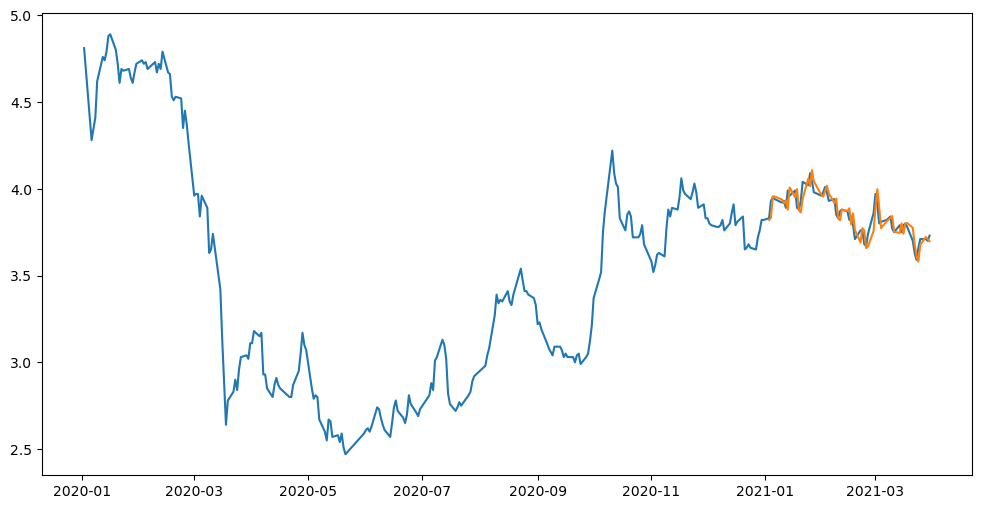

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data_E['Date'], train_data_E['Price'], label='Price')
plt.plot(train_data_E['Date'], train_data_E['predictions'], label='Date')

In [126]:
def calculate_bollinger_bands(train_data, window=20, num_std_dev=2, price_column='Price'):
    # Calculate the Simple Moving Average (SMA)
    train_data['SMA'] = train_data[price_column].rolling(window=window).mean().shift()

    # Calculate the Standard Deviation (SD)
    train_data['SD'] = train_data[price_column].rolling(window=window).std().shift()

    # Calculate the Upper Bollinger Band (UBB) and Lower Bollinger Band (LBB)
    train_data['UBB'] = train_data['SMA'] + num_std_dev * train_data['SD']
    train_data['LBB'] = train_data['SMA'] - num_std_dev * train_data['SD']

    return train_data



# Calculate Bollinger Bands
train_data_E = calculate_bollinger_bands(train_data_E)

# Display the DataFrame with Bollinger Bands
print(train_data_E)

          Date  Price  Open  High   Low     Vol. Change %  test_data_price  \
0   2020-01-02   4.81  4.81  4.87  4.78  241.60K   -0.21%              NaN   
1   2020-01-05   4.41   4.7   4.7  4.33    3.76M   -8.32%              NaN   
2   2020-01-06   4.28  4.16  4.44  4.12    2.52M   -2.95%              NaN   
3   2020-01-08   4.41  4.19  4.59  4.15    3.52M    3.04%              NaN   
4   2020-01-09   4.62  4.55   4.7  4.55    2.09M    4.76%              NaN   
..         ...    ...   ...   ...   ...      ...      ...              ...   
299 2021-03-24   3.66  3.69  3.74   3.6    1.75M    1.95%             3.66   
300 2021-03-25   3.71  3.62  3.78  3.59    2.50M    1.37%             3.71   
301 2021-03-28   3.71  3.76  3.76  3.68    2.34M    0.00%             3.71   
302 2021-03-29   3.70  3.69  3.73  3.68    1.25M   -0.27%             3.70   
303 2021-03-30   3.73  3.71  3.76  3.67    3.43M    0.81%             3.73   

     predictions     SMA        SD       UBB       LBB  
0     

C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1130934194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SMA'] = train_data[price_column].rolling(window=window).mean().shift()
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1130934194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SD'] = train_data[price_column].rolling(window=window).std().shift()
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1130934194.py:9: SettingWithCopyWarning: 
A value is trying to be set on

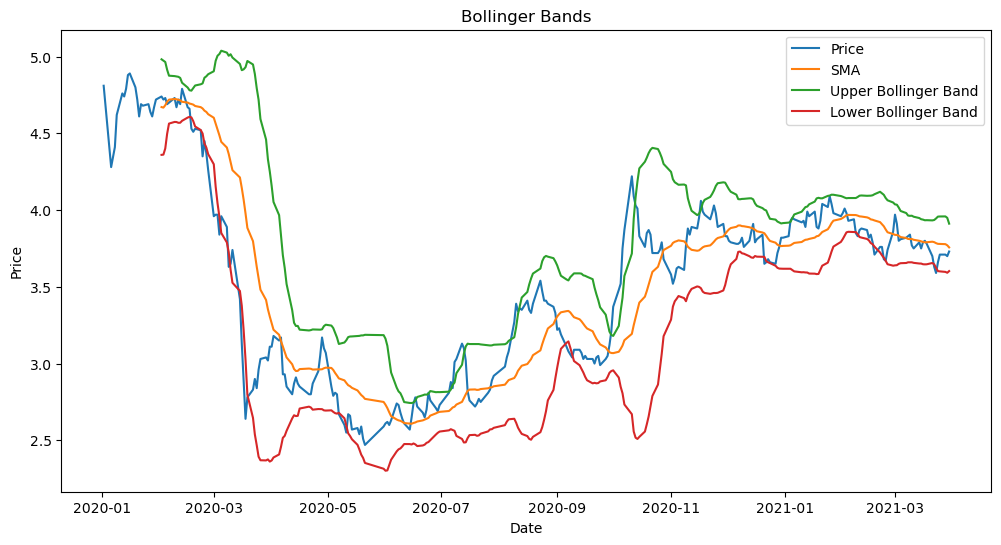

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data_E['Date'], train_data_E['Price'], label='Price')
plt.plot(train_data_E['Date'], train_data_E['SMA'], label='SMA')
plt.plot(train_data_E['Date'], train_data_E['UBB'], label='Upper Bollinger Band')
plt.plot(train_data_E['Date'], train_data_E['LBB'], label='Lower Bollinger Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [130]:
def calculate_profit(train_data):
    # Initialize variables
    balance = 10000  # Initial balance in USD
    shares = 0
    position = None
    buy_price = None
    profit = 0

    # Iterate through each row in the DataFrame
    for index, row in train_data.iterrows():
        close_price = row['Price']
        upper_band = row['UBB']
        lower_band = row['LBB']

        # Buy condition: price is below the lower Bollinger Band
        if close_price < lower_band:
            if shares ==0:
                shares = balance / close_price
                buy_price = close_price
                balance = 0
                position = 'buy'
            else:
                 position='hold'

        # Sell condition: price is above the upper Bollinger Band
        elif close_price > upper_band:
            if shares>0:
                balance = shares * close_price
                profit += balance - 10000  # Subtract initial balance
                shares = 0
                position = 'sell'
            else:
                 position='hold'
        else:
            position='hold'
        print(close_price,position,shares,balance,shares*close_price,(shares*close_price)+balance-10000,row['Date'])  
      

    # Sell remaining shares at the last data point
    if position == 'buy':
        balance = shares * df.iloc[-1]['Price']
        profit += balance - 10000  # Subtract initial balance
        

    return profit

# Example usage:
# Calculate Bollinger Bands
train_data_E = calculate_bollinger_bands(train_data_E)

# Calculate profit
profit = calculate_profit(train_data_E[train_data_E['Date'] > '2020-12-31'])
print("Profit from Bollinger Bands trading strategy: ${:.2f}".format(profit))

3.83 hold 0 10000 0.0 0.0 2021-01-03 00:00:00
3.93 hold 0 10000 0.0 0.0 2021-01-04 00:00:00
3.95 hold 0 10000 0.0 0.0 2021-01-05 00:00:00
3.94 hold 0 10000 0.0 0.0 2021-01-06 00:00:00
3.92 hold 0 10000 0.0 0.0 2021-01-10 00:00:00
3.93 hold 0 10000 0.0 0.0 2021-01-11 00:00:00
3.89 hold 0 10000 0.0 0.0 2021-01-12 00:00:00
3.99 hold 0 10000 0.0 0.0 2021-01-13 00:00:00
3.96 hold 0 10000 0.0 0.0 2021-01-14 00:00:00
3.99 hold 0 10000 0.0 0.0 2021-01-17 00:00:00
3.89 hold 0 10000 0.0 0.0 2021-01-18 00:00:00
3.88 hold 0 10000 0.0 0.0 2021-01-19 00:00:00
3.93 hold 0 10000 0.0 0.0 2021-01-20 00:00:00
4.04 hold 0 10000 0.0 0.0 2021-01-21 00:00:00
4.02 hold 0 10000 0.0 0.0 2021-01-24 00:00:00
4.09 hold 0 10000 0.0 0.0 2021-01-25 00:00:00
4.04 hold 0 10000 0.0 0.0 2021-01-26 00:00:00
3.98 hold 0 10000 0.0 0.0 2021-01-27 00:00:00
3.96 hold 0 10000 0.0 0.0 2021-01-31 00:00:00
3.98 hold 0 10000 0.0 0.0 2021-02-01 00:00:00
4.01 hold 0 10000 0.0 0.0 2021-02-02 00:00:00
3.98 hold 0 10000 0.0 0.0 2021-02-

C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1130934194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SMA'] = train_data[price_column].rolling(window=window).mean().shift()
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1130934194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SD'] = train_data[price_column].rolling(window=window).std().shift()
C:\Users\shanj\AppData\Local\Temp\ipykernel_31196\1130934194.py:9: SettingWithCopyWarning: 
A value is trying to be set on